In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

# Baca dataset
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

In [4]:
# 1. Melihat informasi dasar dataset
print("=== Informasi Dataset ===")
print("\nBentuk dataset:", df.shape)
print("\nInformasi dataset:")
df.info()
print("\nStatistik deskriptif:")
print(df.describe())

=== Informasi Dataset ===

Bentuk dataset: (5110, 12)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Statistik deskriptif:
                 id          age  hypertension  heart_diseas

In [5]:
# 2. Cek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



=== Distribusi Target ===
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


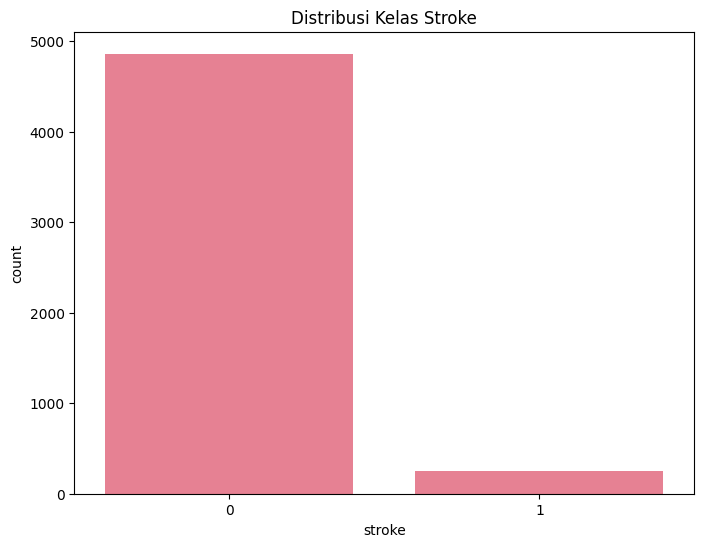

In [6]:
# 3. Distribusi kelas target (stroke)
print("\n=== Distribusi Target ===")
print(df['stroke'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke')
plt.title('Distribusi Kelas Stroke')
plt.show()

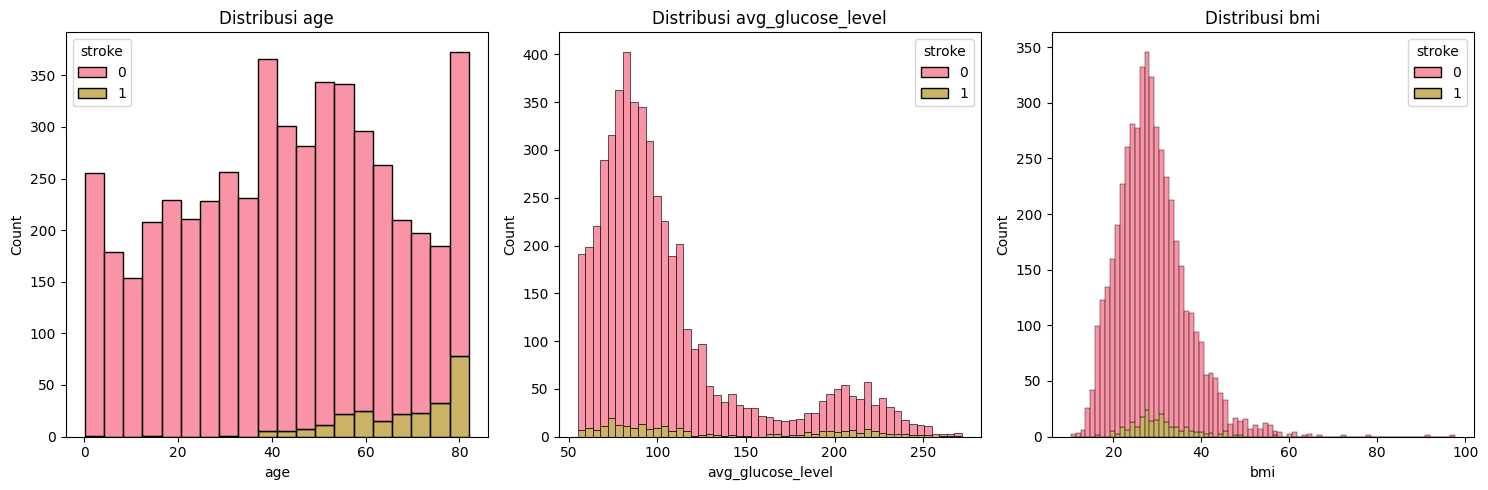

In [7]:
# 4. Analisis variabel numerik
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, hue='stroke', multiple="stack")
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

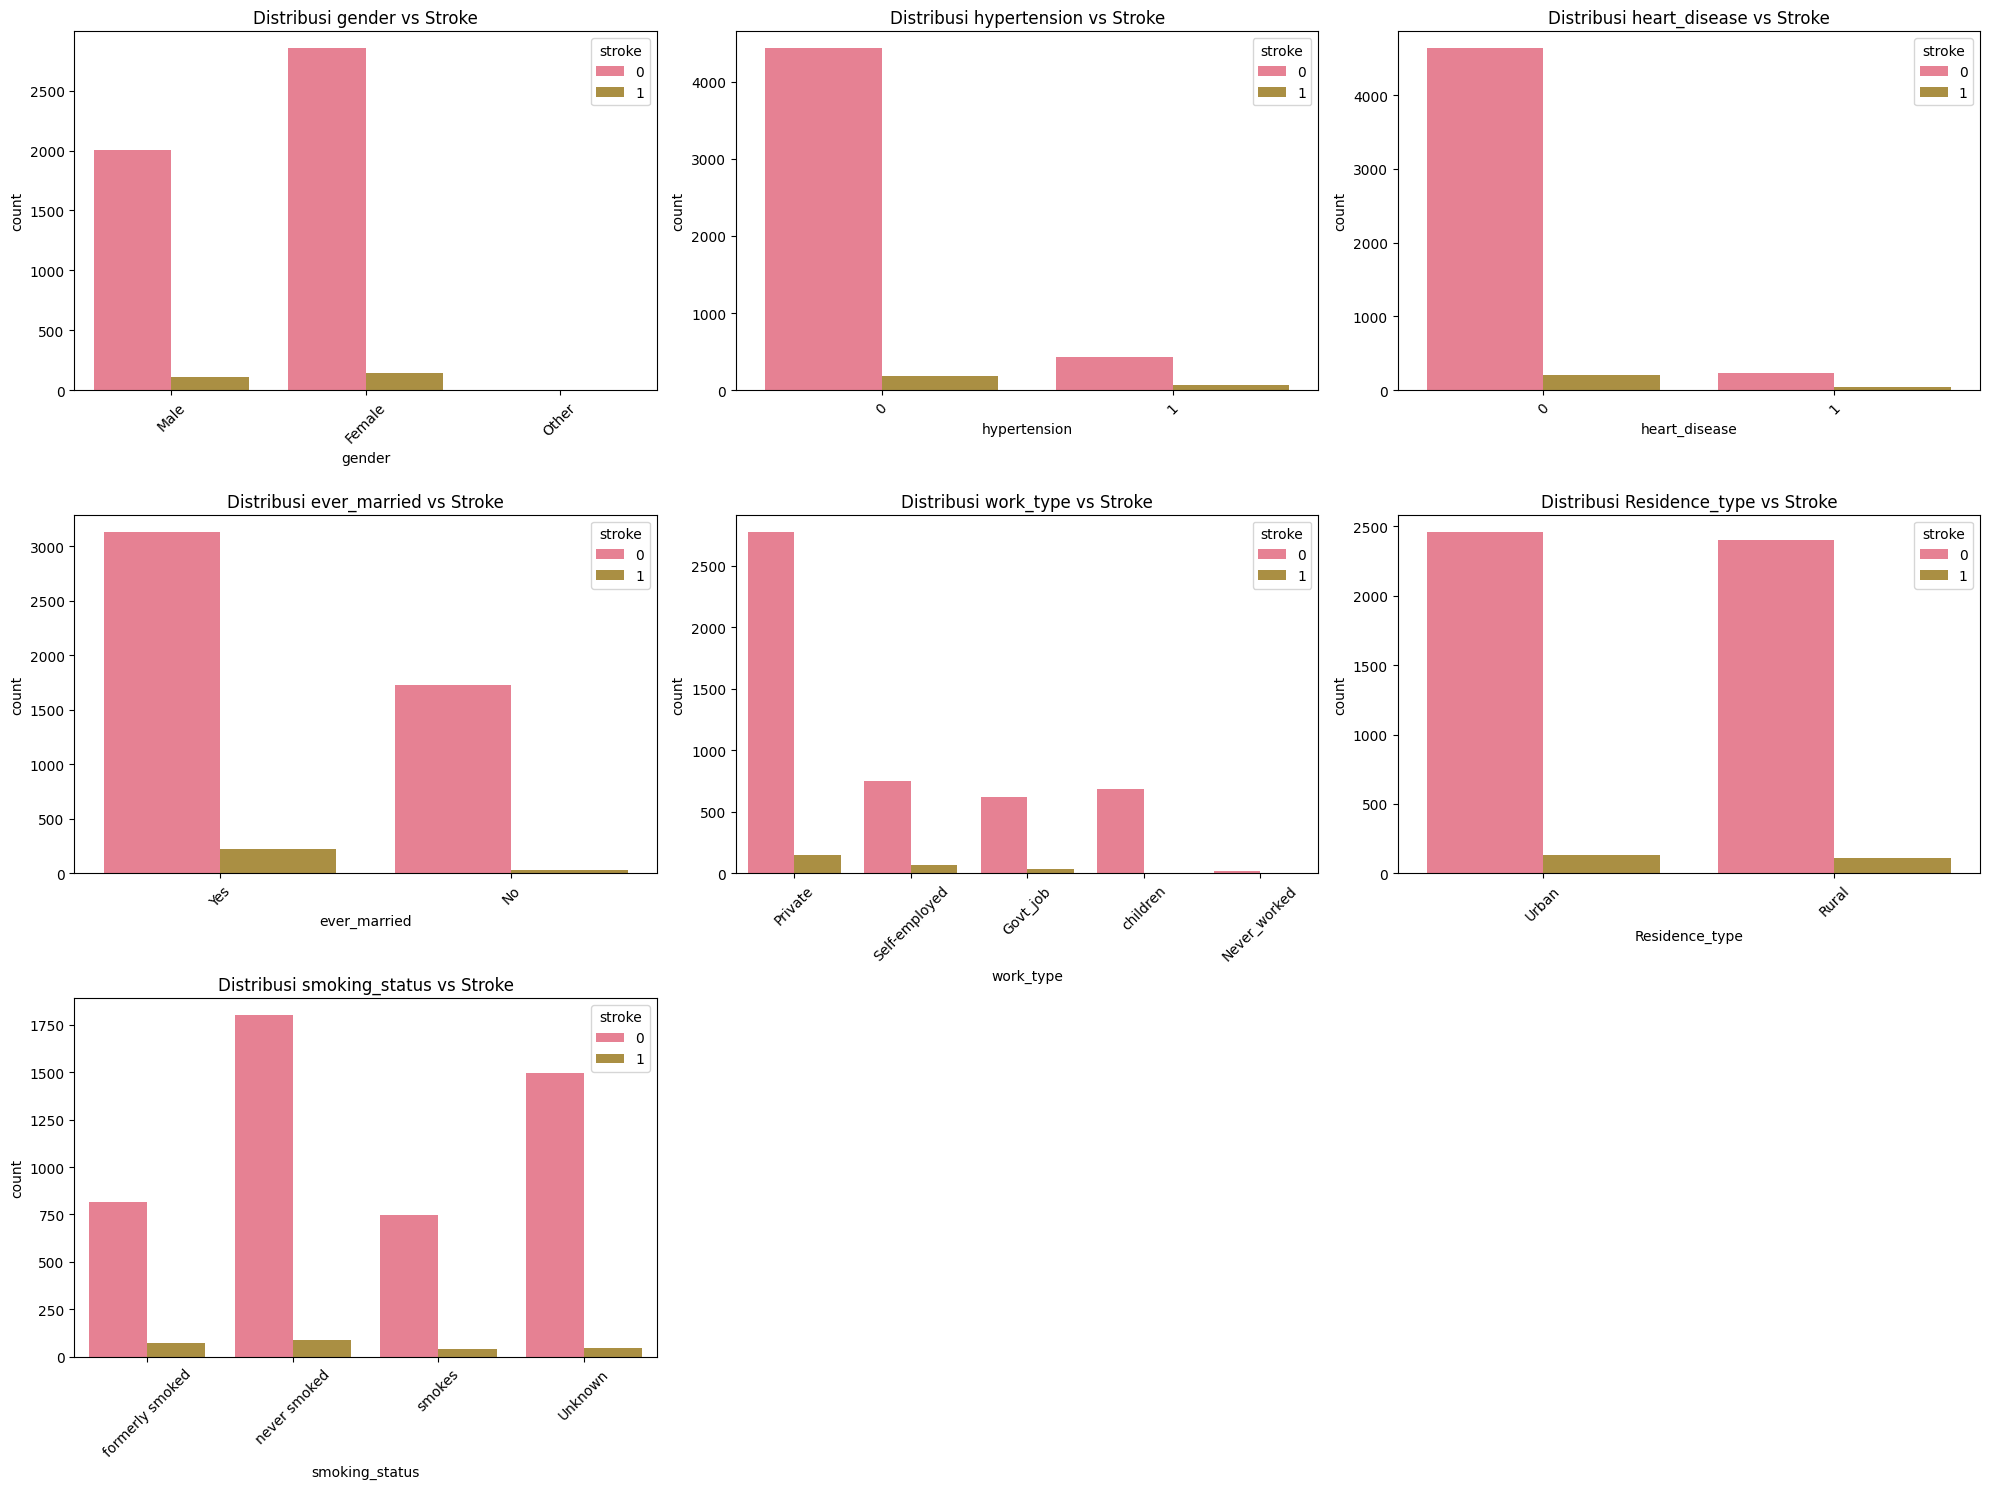

In [8]:
# 5. Analisis variabel kategorikal
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                   'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='stroke')
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col} vs Stroke')
plt.tight_layout()
plt.show()

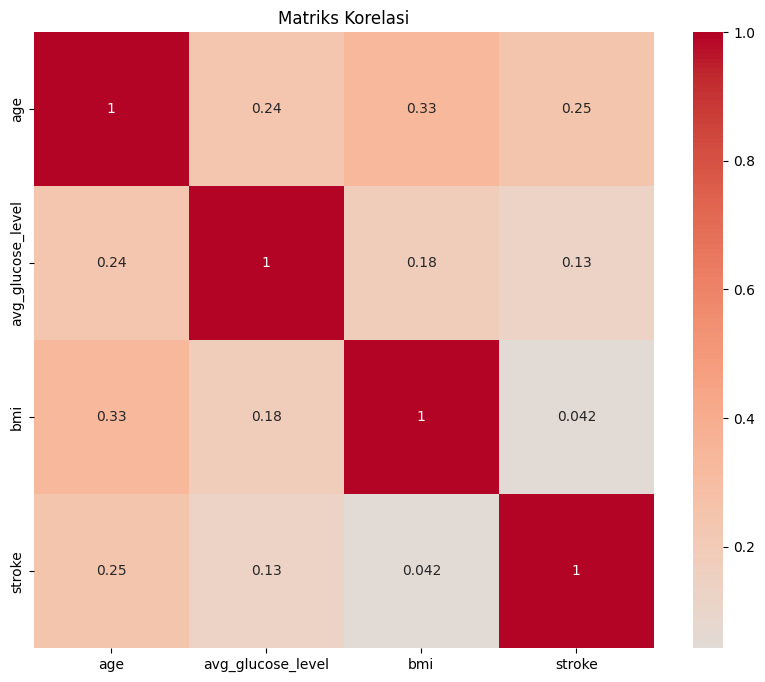

In [9]:
# 6. Analisis korelasi untuk variabel numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols + ['stroke']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()

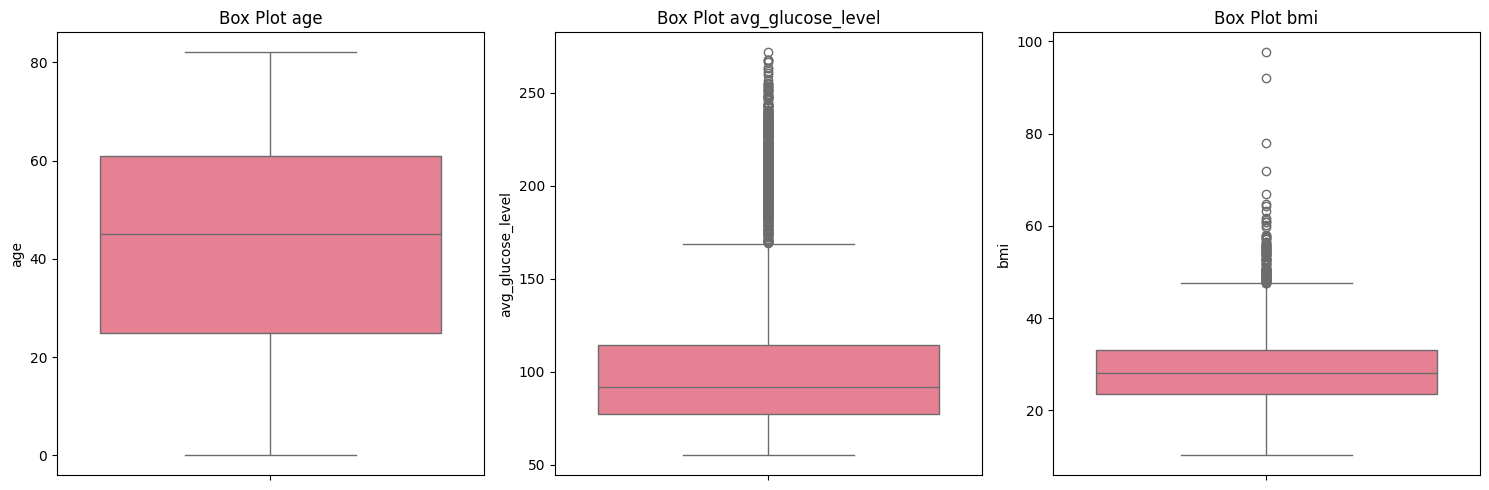

In [10]:
# 7. Box plots untuk outlier detection
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot {col}')
plt.tight_layout()
plt.show()

In [11]:
# 8. Analisis statistik dasar
print("\n=== Analisis Statistik ===")
# Uji normalitas untuk variabel numerik
for col in numeric_cols:
    stat, p_value = stats.normaltest(df[col].dropna())
    print(f"\nUji normalitas untuk {col}:")
    print(f"p-value: {p_value}")


=== Analisis Statistik ===

Uji normalitas untuk age:
p-value: 4.7895697274981233e-244

Uji normalitas untuk avg_glucose_level:
p-value: 2.662310941715711e-289

Uji normalitas untuk bmi:
p-value: 1.793444363882936e-222


In [12]:
# 9. Simpan insights penting
insights = """
Insights dari Eksplorasi Data:
1. Dataset memiliki {total} sampel dengan {features} fitur
2. Persentase kasus stroke: {stroke_percent:.2f}%
3. Missing values ditemukan pada kolom: {missing_cols}
4. Variabel numerik yang berkorelasi kuat dengan stroke: {corr_vars}
5. Distribusi umur menunjukkan mayoritas pasien berusia {age_range}
6. Terdapat outliers pada: {outlier_cols}
""".format(
    total=len(df),
    features=len(df.columns),
    stroke_percent=df['stroke'].mean()*100,
    missing_cols=df.columns[df.isnull().any()].tolist(),
    corr_vars=[col for col in numeric_cols if abs(df[col].corr(df['stroke'])) > 0.1],
    age_range=f"{df['age'].min()}-{df['age'].max()}",
    outlier_cols=[col for col in numeric_cols if df[col].std() > df[col].mean()]
)

print(insights)


Insights dari Eksplorasi Data:
1. Dataset memiliki 5110 sampel dengan 12 fitur
2. Persentase kasus stroke: 4.87%
3. Missing values ditemukan pada kolom: ['bmi']
4. Variabel numerik yang berkorelasi kuat dengan stroke: ['age', 'avg_glucose_level']
5. Distribusi umur menunjukkan mayoritas pasien berusia 0.08-82.0
6. Terdapat outliers pada: []

